In [6]:
from math import pi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the CSV file
results_df = pd.read_csv('/h/andrei/memory_bench/training_scripts/final_results/remember_results_no-hallway.csv')

# Display the first few rows of the dataframe
results_df.head()

,Name,State,User,algo_name,env_name,task_variant,eval_ep_reward_means_mean,total_timesteps,trial_completed,Runtime,...,num_of_trial_repeats,os,task_configs.allergic_prob,task_configs.allergic_tastiness,task_configs.episode_step_count,task_configs.love_prob,task_configs.love_tastiness,trial_offset,eval_ep_batch_limit,parallelism_override
0,iconic-sea-149,finished,atomictwoandrei,RecurrentPPO,MatchingPairs,standard,0.000000,500000,True,13129,...,2,linux,NaN,NaN,NaN,NaN,NaN,3,10,single_agent
1,vital-cherry-139,finished,atomictwoandrei,DQN,MatchingPairs,standard,1.416667,500000,True,10353,...,1,linux,NaN,NaN,NaN,NaN,NaN,4,10,single_agent
2,drawn-yogurt-138,finished,atomictwoandrei,RecurrentPPO,MatchingPairs,standard,0.000000,500000,True,12992,...,2,linux,NaN,NaN,NaN,NaN,NaN,3,10,single_agent
3,quiet-moon-137,finished,atomictwoandrei,PPO,MatchingPairs,standard,0.000000,500000,True,10467,...,1,linux,NaN,NaN,NaN,NaN,NaN,4,10,single_agent
4,revived-fog-132,finished,atomictwoandrei,RecurrentPPO,MatchingPairs,standard,0.000000,500000,True,12734,...,4,linux,NaN,NaN,NaN,NaN,NaN,1,10,single_agent


In [2]:
# Set the style for plots
sns.set_style("whitegrid")

# Get the unique environments
environments = results_df['env_name'].unique()

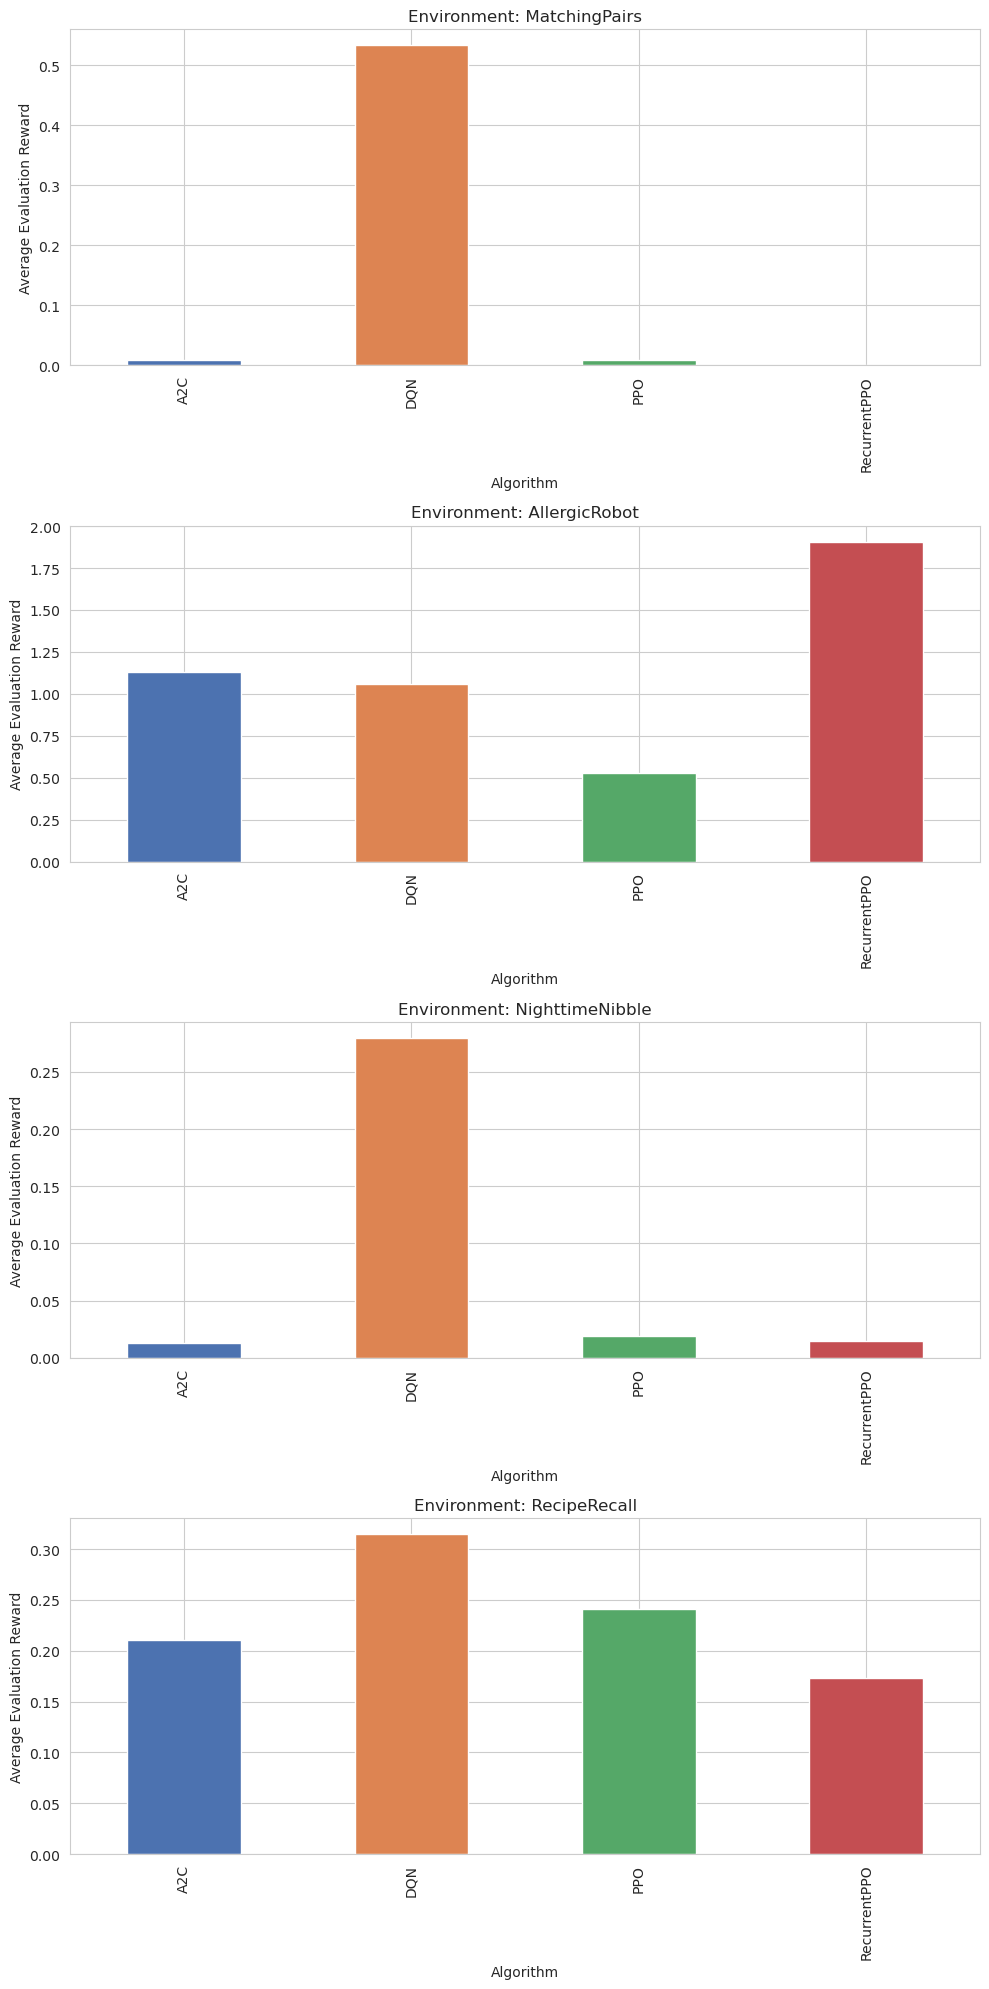

In [3]:
# Create a subplot for each environment
fig, axes = plt.subplots(nrows=len(environments), figsize=(10, 5 * len(environments)))

for ax, env in zip(axes, environments):
    # Filter the data for the current environment
    env_data = results_df[results_df['env_name'] == env]
    
    # Group by the algorithm name and calculate the mean of eval_ep_reward_means_mean across trials
    mean_scores = env_data.groupby('algo_name')['eval_ep_reward_means_mean'].mean()
    
    # Plot the data
    mean_scores.plot(kind='bar', ax=ax, color=sns.color_palette("deep"))
    ax.set_title(f'Environment: {env}')
    ax.set_ylabel('Average Evaluation Reward')
    ax.set_xlabel('Algorithm')

plt.tight_layout()
plt.show()

In [14]:
# Define a mapping of environments to the types of memory they test
memory_types_mapping = {
    'Allergic Robot': ['episodic'],
    'Nighttime Nibble': ['short-term', 'episodic', 'spatial'],
    'Recipe Recall': ['short-term', 'episodic', 'semantic'],
    'Matching Pairs': ['short-term', 'procedural']
}

# Get the unique algorithms and memory types
algorithms = results_df['algo_name'].unique()
memory_types = set([memory for sublist in memory_types_mapping.values() for memory in sublist])

# Mapping of environment names to their actual names in the dataframe
env_to_df_name_mapping = {
    'Allergic Robot': 'AllergicRobot',
    'Nighttime Nibble': 'NighttimeNibble',
    'Recipe Recall': 'RecipeRecall',
    'Matching Pairs': 'MatchingPairs'
}

# Calculate theta for radar plot
theta = [n / float(len(memory_types)) * 2 * pi for n in range(len(memory_types))]
theta += theta[:1]

# Use a more visually distinct color palette
colors = sns.color_palette("husl", len(algorithms))

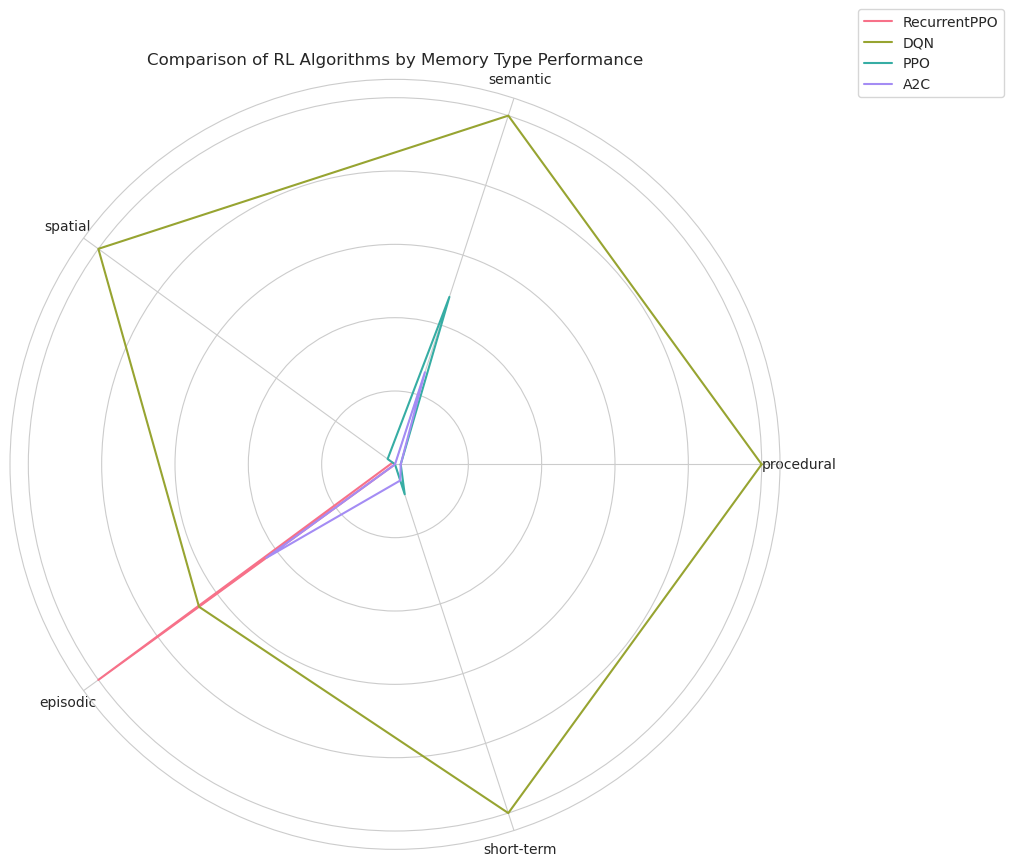

In [18]:
# Initialize the dataframe to store the scores
memory_scores_df = pd.DataFrame(index=algorithms, columns=memory_types).fillna(0)

# Calculate the average scores for each memory type
for algo in algorithms:
    for memory, envs in memory_types_mapping.items():
        env_name_in_df = env_to_df_name_mapping[memory]
        relevant_data = results_df[(results_df['algo_name'] == algo) & (results_df['env_name'] == env_name_in_df)]
        avg_score = relevant_data['eval_ep_reward_means_mean'].mean()
        for mem_type in envs:
            memory_scores_df.loc[algo, mem_type] += avg_score

# Normalize the scores to [0, 1] for better visualization in the radar plot
memory_scores_df = (memory_scores_df - memory_scores_df.min()) / (memory_scores_df.max() - memory_scores_df.min())

# Create the radar plot with updated colors
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Add each algorithm's data to the plot with the new colors
for algo, color in zip(algorithms, colors):
    values = memory_scores_df.loc[algo].tolist()
    values += values[:1]
    ax.plot(theta, values, label=algo, color=color)

# Set the yticks to be empty as we're more interested in the relative differences
ax.set_yticklabels([])

# Set the xticks and xticklabels to the memory types
ax.set_xticks(theta[:-1])
ax.set_xticklabels(memory_types)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.title('Comparison of RL Algorithms by Memory Type Performance')
plt.show()

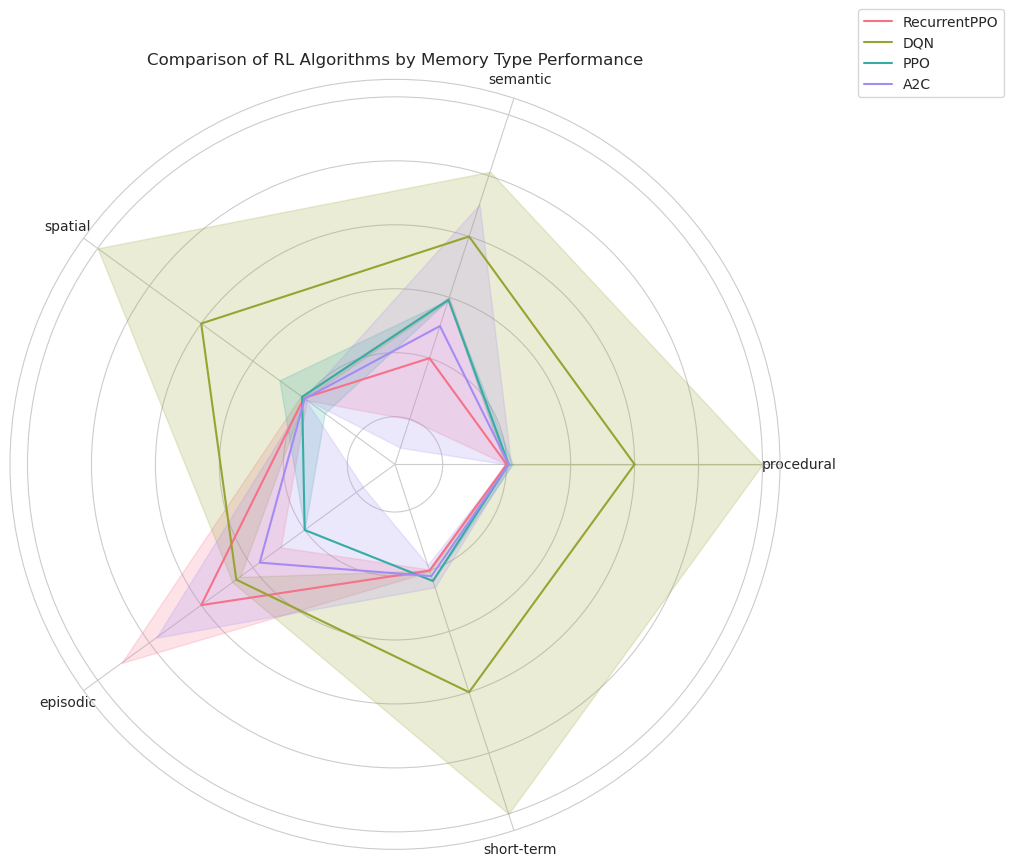

In [17]:
# Initialize the dataframe to store the scores
memory_scores_df = pd.DataFrame(index=algorithms, columns=memory_types).fillna(0)

# Calculate the average scores for each memory type
for algo in algorithms:
    for memory, envs in memory_types_mapping.items():
        env_name_in_df = env_to_df_name_mapping[memory]
        relevant_data = results_df[(results_df['algo_name'] == algo) & (results_df['env_name'] == env_name_in_df)]
        avg_score = relevant_data['eval_ep_reward_means_mean'].mean()
        for mem_type in envs:
            memory_scores_df.loc[algo, mem_type] += avg_score

# Normalize the scores to [0, 1] for better visualization in the radar plot
memory_scores_df = (memory_scores_df - memory_scores_df.min()) / (memory_scores_df.max() - memory_scores_df.min())


# Initialize the dataframe to store the standard deviations
memory_std_df = pd.DataFrame(index=algorithms, columns=memory_types).fillna(0)

# Calculate the standard deviations for each memory type
for algo in algorithms:
    for memory, envs in memory_types_mapping.items():
        env_name_in_df = env_to_df_name_mapping[memory]
        relevant_data = results_df[(results_df['algo_name'] == algo) & (results_df['env_name'] == env_name_in_df)]
        std_score = relevant_data['eval_ep_reward_means_mean'].std()
        for mem_type in envs:
            memory_std_df.loc[algo, mem_type] += std_score

# Normalize the standard deviations to [0, 1] for better visualization in the radar plot
memory_std_df = (memory_std_df - memory_std_df.min()) / (memory_std_df.max() - memory_std_df.min())


# Create the radar plot with updated colors and semi-transparent regions
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Add each algorithm's data to the plot with the new colors and semi-transparent regions
for algo, color in zip(algorithms, colors):
    values = memory_scores_df.loc[algo].tolist()
    std_values = memory_std_df.loc[algo].tolist()
    values += values[:1]
    std_values += std_values[:1]
    
    ax.plot(theta, values, label=algo, color=color)
    ax.fill_between(theta, [v-s for v, s in zip(values, std_values)], [v+s for v, s in zip(values, std_values)], 
                    color=color, alpha=0.2)

# Set the yticks to be empty as we're more interested in the relative differences
ax.set_yticklabels([])

# Set the xticks and xticklabels to the memory types
ax.set_xticks(theta[:-1])
ax.set_xticklabels(memory_types)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.title('Comparison of RL Algorithms by Memory Type Performance')
plt.show()

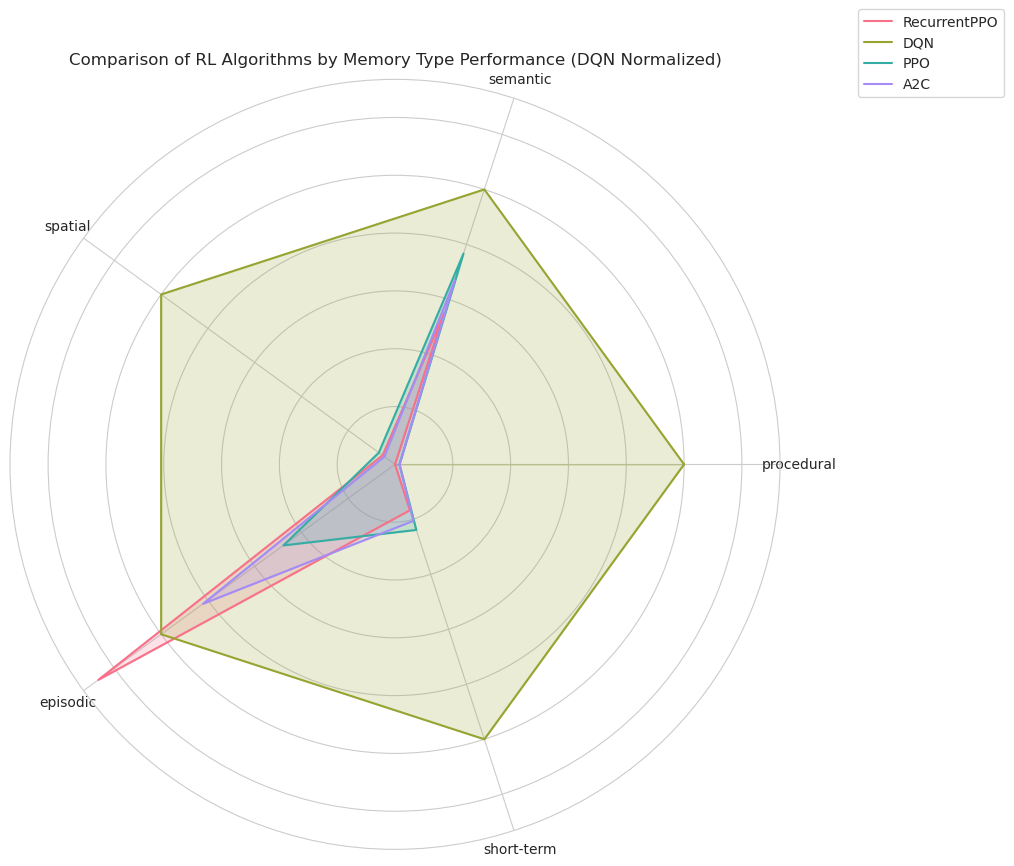

In [19]:
# Initialize the dataframe to store the scores
memory_scores_df = pd.DataFrame(index=algorithms, columns=memory_types).fillna(0)

# Calculate the average scores for each memory type
for algo in algorithms:
    for memory, envs in memory_types_mapping.items():
        if memory in env_to_df_name_mapping:  # Check if the memory is present in the mapping
            env_name_in_df = env_to_df_name_mapping[memory]
            relevant_data = results_df[(results_df['algo_name'] == algo) & (results_df['env_name'] == env_name_in_df)]
            avg_score = relevant_data['eval_ep_reward_means_mean'].mean()
            for mem_type in envs:
                memory_scores_df.loc[algo, mem_type] += avg_score

# Normalize the scores based on DQN performance
dqn_normalized_memory_scores_df = memory_scores_df.copy()
for algo in algorithms:
    for mem_type in memory_types:
        dqn_normalized_memory_scores_df.loc[algo, mem_type] = memory_scores_df.loc[algo, mem_type] / memory_scores_df.loc['DQN', mem_type]

# Create the radar plot with updated colors and semi-transparent regions
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Add each algorithm's data to the plot with the new colors and semi-transparent regions
for algo, color in zip(algorithms, colors):
    values = dqn_normalized_memory_scores_df.loc[algo].tolist()
    values += values[:1]
    
    ax.plot(theta, values, label=algo, color=color)
    ax.fill_between(theta, values, alpha=0.2, color=color)

# Set the yticks to be empty as we're more interested in the relative differences
ax.set_yticklabels([])

# Set the xticks and xticklabels to the memory types
ax.set_xticks(theta[:-1])
ax.set_xticklabels(memory_types)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.title('Comparison of RL Algorithms by Memory Type Performance (DQN Normalized)')
plt.show()

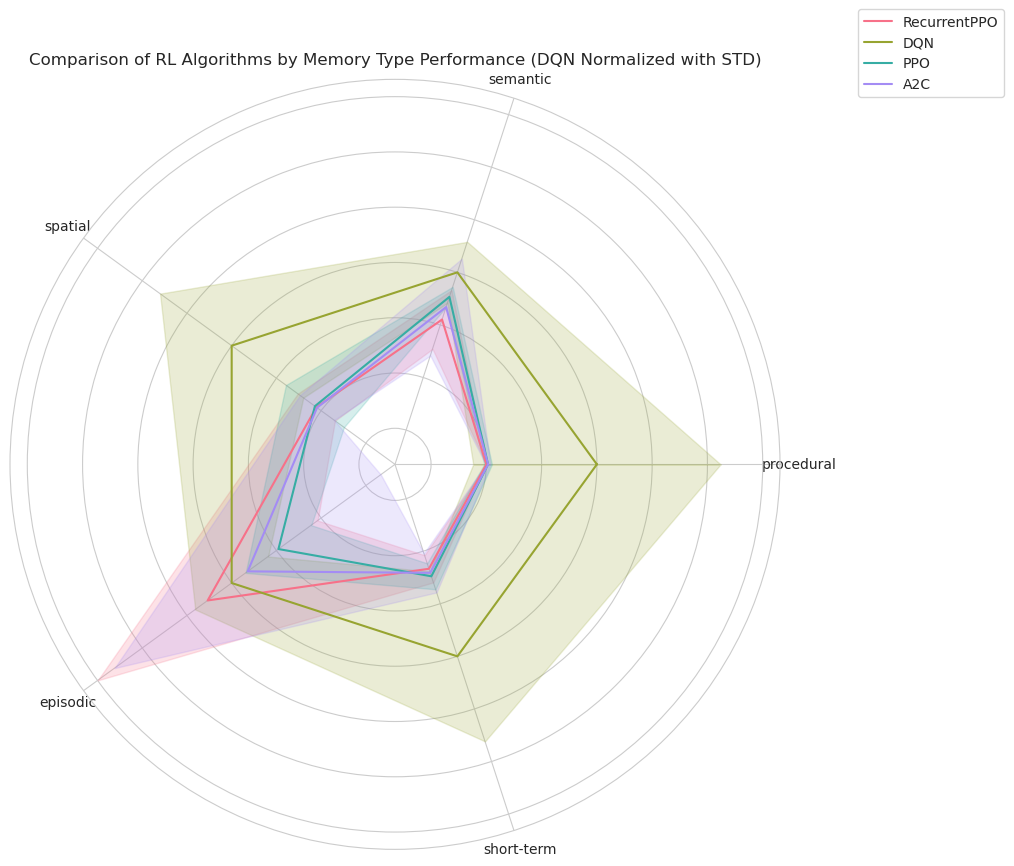

In [20]:
# Initialize the dataframe to store the standard deviations
memory_std_df = pd.DataFrame(index=algorithms, columns=memory_types).fillna(0)

# Calculate the standard deviations for each memory type
for algo in algorithms:
    for memory, envs in memory_types_mapping.items():
        if memory in env_to_df_name_mapping:  # Check if the memory is present in the mapping
            env_name_in_df = env_to_df_name_mapping[memory]
            relevant_data = results_df[(results_df['algo_name'] == algo) & (results_df['env_name'] == env_name_in_df)]
            std_score = relevant_data['eval_ep_reward_means_mean'].std()
            for mem_type in envs:
                memory_std_df.loc[algo, mem_type] += std_score

# Normalize the standard deviations based on DQN performance
dqn_normalized_memory_std_df = memory_std_df.copy()
for algo in algorithms:
    for mem_type in memory_types:
        dqn_normalized_memory_std_df.loc[algo, mem_type] = memory_std_df.loc[algo, mem_type] / memory_scores_df.loc['DQN', mem_type]

# Create the radar plot with updated colors and semi-transparent regions to show standard deviation
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Add each algorithm's data to the plot with the new colors and semi-transparent regions for standard deviation
for algo, color in zip(algorithms, colors):
    values = dqn_normalized_memory_scores_df.loc[algo].tolist()
    std_values = dqn_normalized_memory_std_df.loc[algo].tolist()
    values += values[:1]
    std_values += std_values[:1]
    
    ax.plot(theta, values, label=algo, color=color)
    ax.fill_between(theta, [v-s for v, s in zip(values, std_values)], [v+s for v, s in zip(values, std_values)], 
                    color=color, alpha=0.2)

# Set the yticks to be empty as we're more interested in the relative differences
ax.set_yticklabels([])

# Set the xticks and xticklabels to the memory types
ax.set_xticks(theta[:-1])
ax.set_xticklabels(memory_types)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.title('Comparison of RL Algorithms by Memory Type Performance (DQN Normalized with STD)')
plt.show()